Import the necessary python packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

upload the data

In [4]:
data = pd.read_csv("/content/winequality-red.csv")
data.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


# EDA

rounding off the values

In [4]:
round(100*(data.isnull().sum()/len(data)),2).sort_values(ascending=False)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [7]:
dub_data=data.copy()
dub_data.drop_duplicates(subset=None,inplace=True)
dub_data.shape
data=dub_data
for col in data:
    print(data[col].value_counts(ascending=False), '\n\n\n')


7.2     49
7.8     48
7.1     46
7.0     44
7.5     42
        ..
13.8     1
13.4     1
4.7      1
15.0     1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64 



0.500    37
0.580    36
0.400    35
0.600    34
0.430    33
         ..
1.185     1
1.240     1
0.845     1
0.365     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64 



0.00    118
0.49     59
0.24     41
0.02     38
0.08     32
       ... 
0.72      1
0.62      1
0.71      1
0.79      1
0.78      1
Name: citric acid, Length: 80, dtype: int64 



2.00     133
2.20     110
1.80     108
2.10     104
1.90      97
        ... 
2.25       1
2.95       1
2.85       1
3.45       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64 



0.080    50
0.078    44
0.074    43
0.084    40
0.076    39
         ..
0.360     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64 



6.0     121
5.0      88
15.0     65
12.0     64
10.0     63
7.0      61
9.0      55
16.0  

Splitting the test and train data

In [8]:
from sklearn.model_selection import train_test_split
X = dub_data.drop(['quality'], axis=1)
Y = dub_data['quality']

X_train, X_valid, Y_train, Y_valid = train_test_split(
	X, Y, train_size=0.8, test_size=0.2, random_state=0)

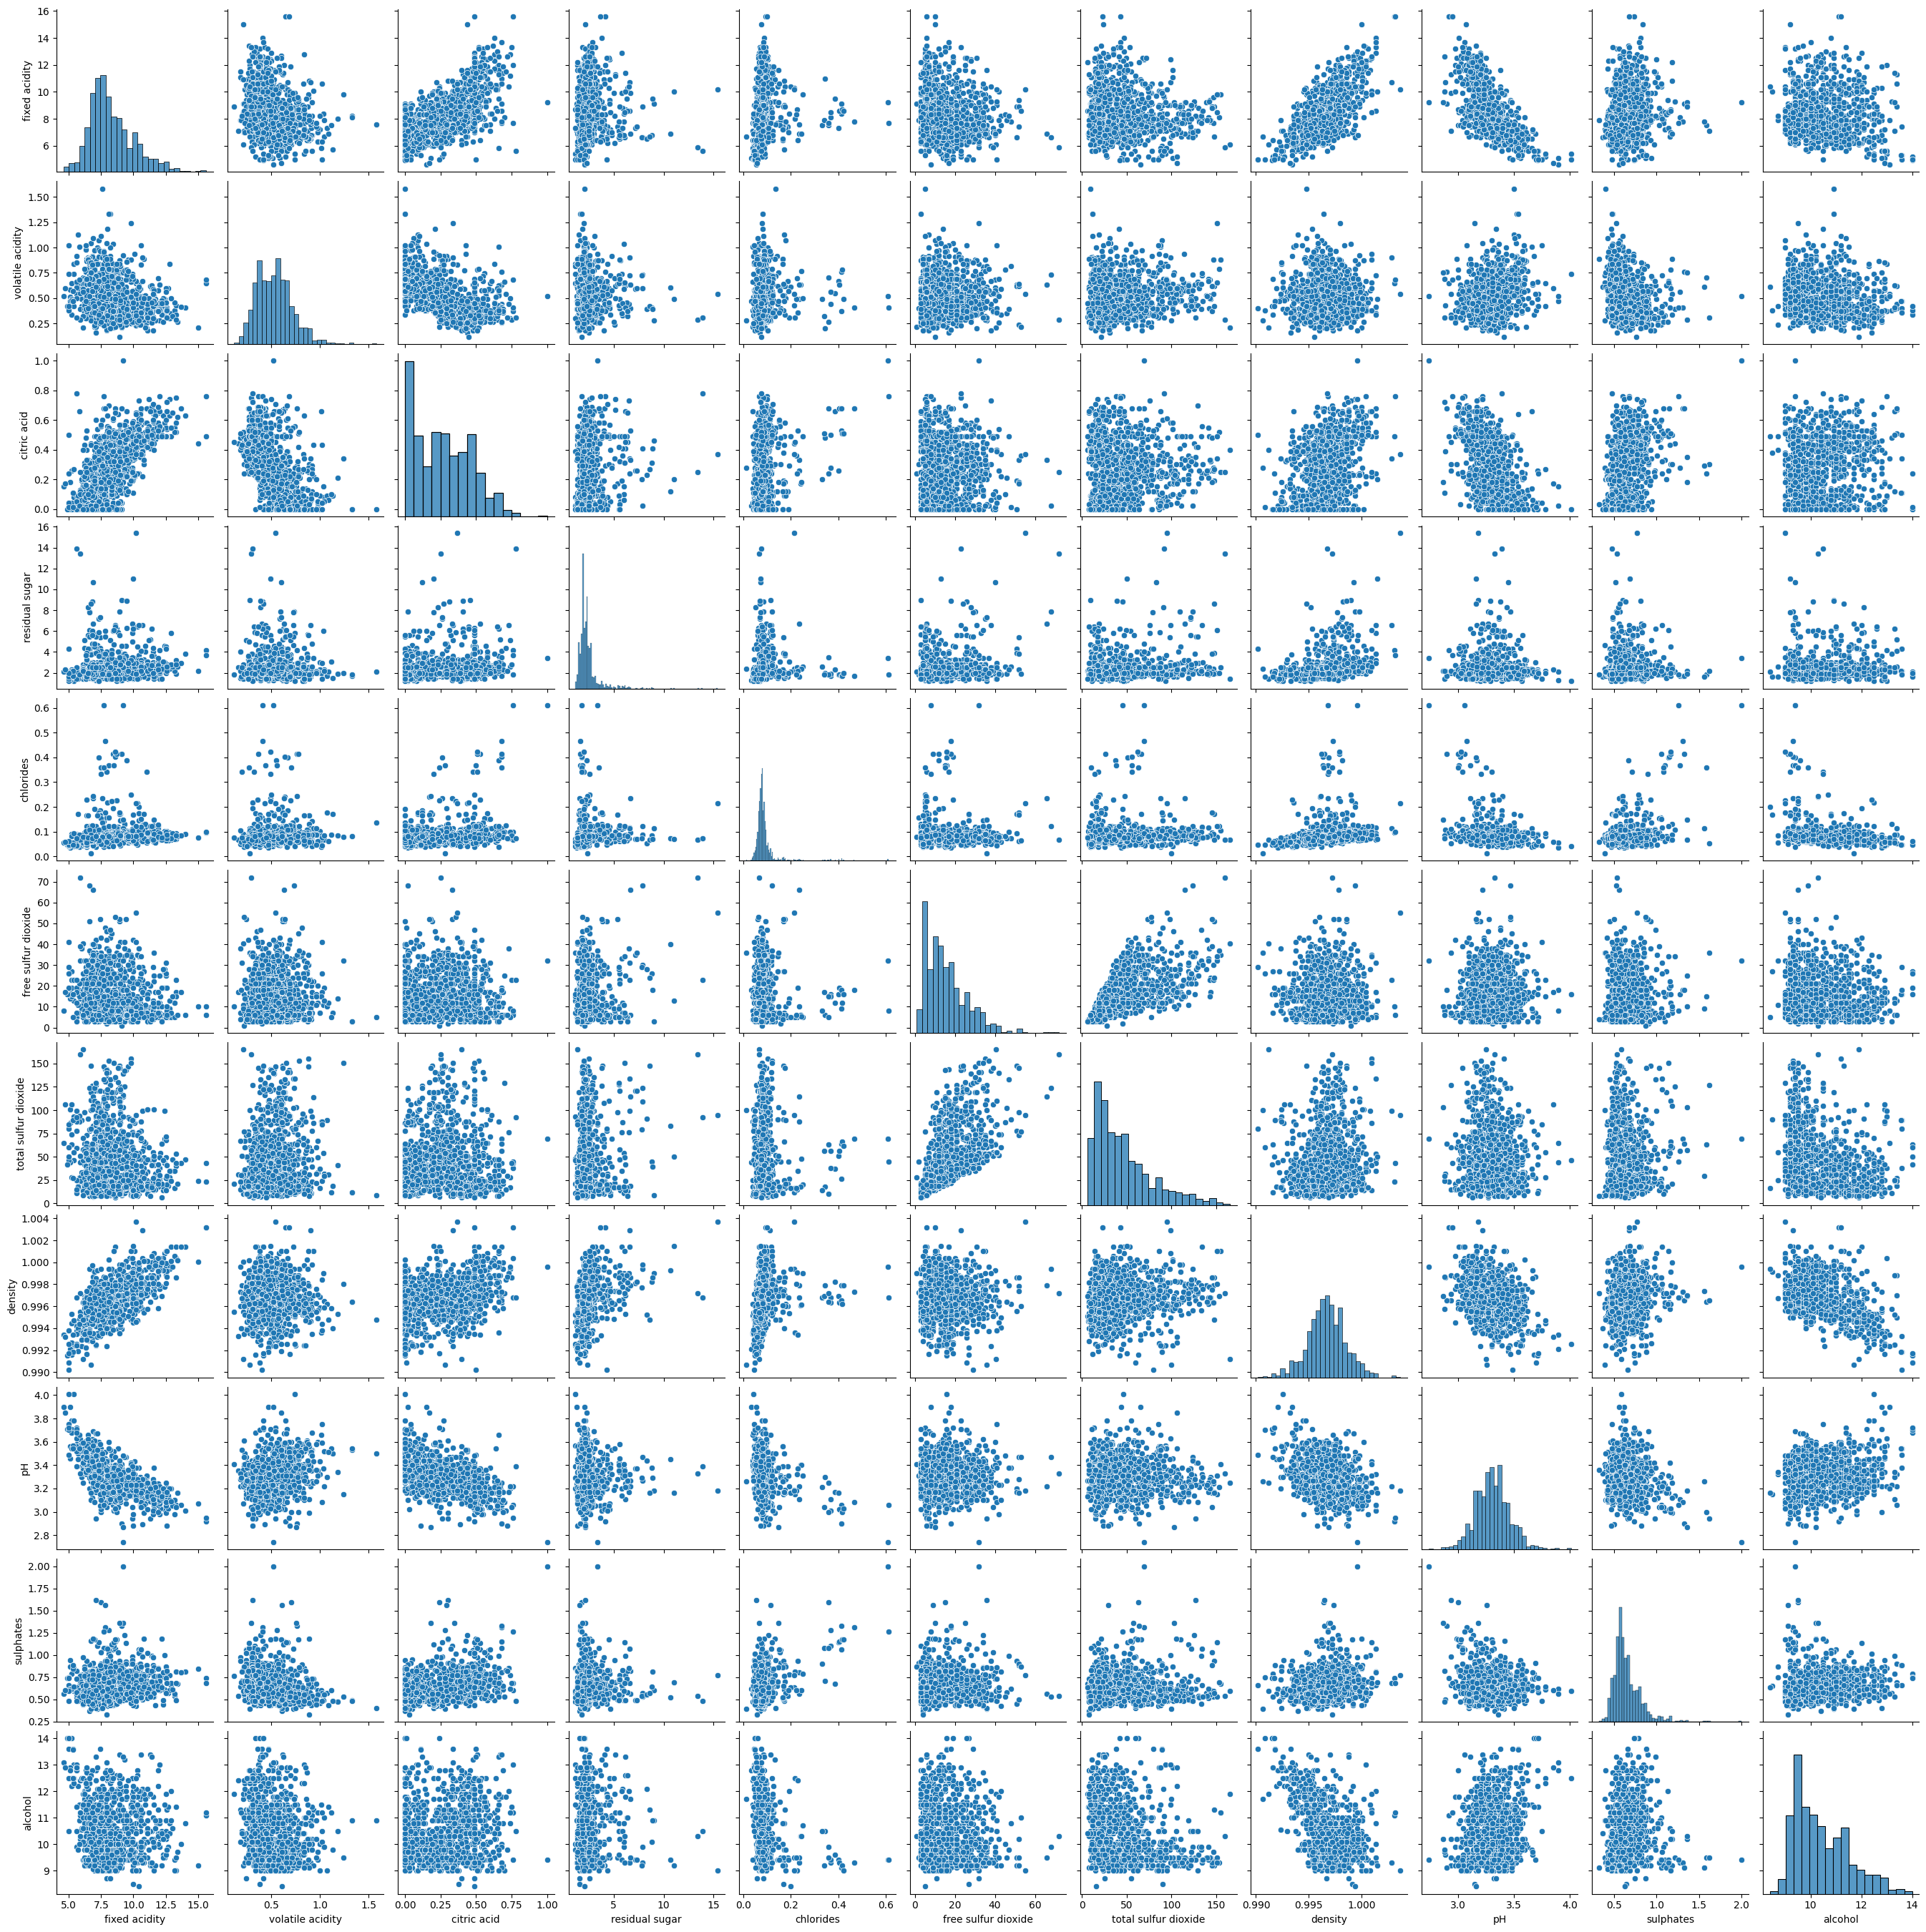

In [9]:
sns.pairplot(X_train)
plt.show()

Correlatio matrix

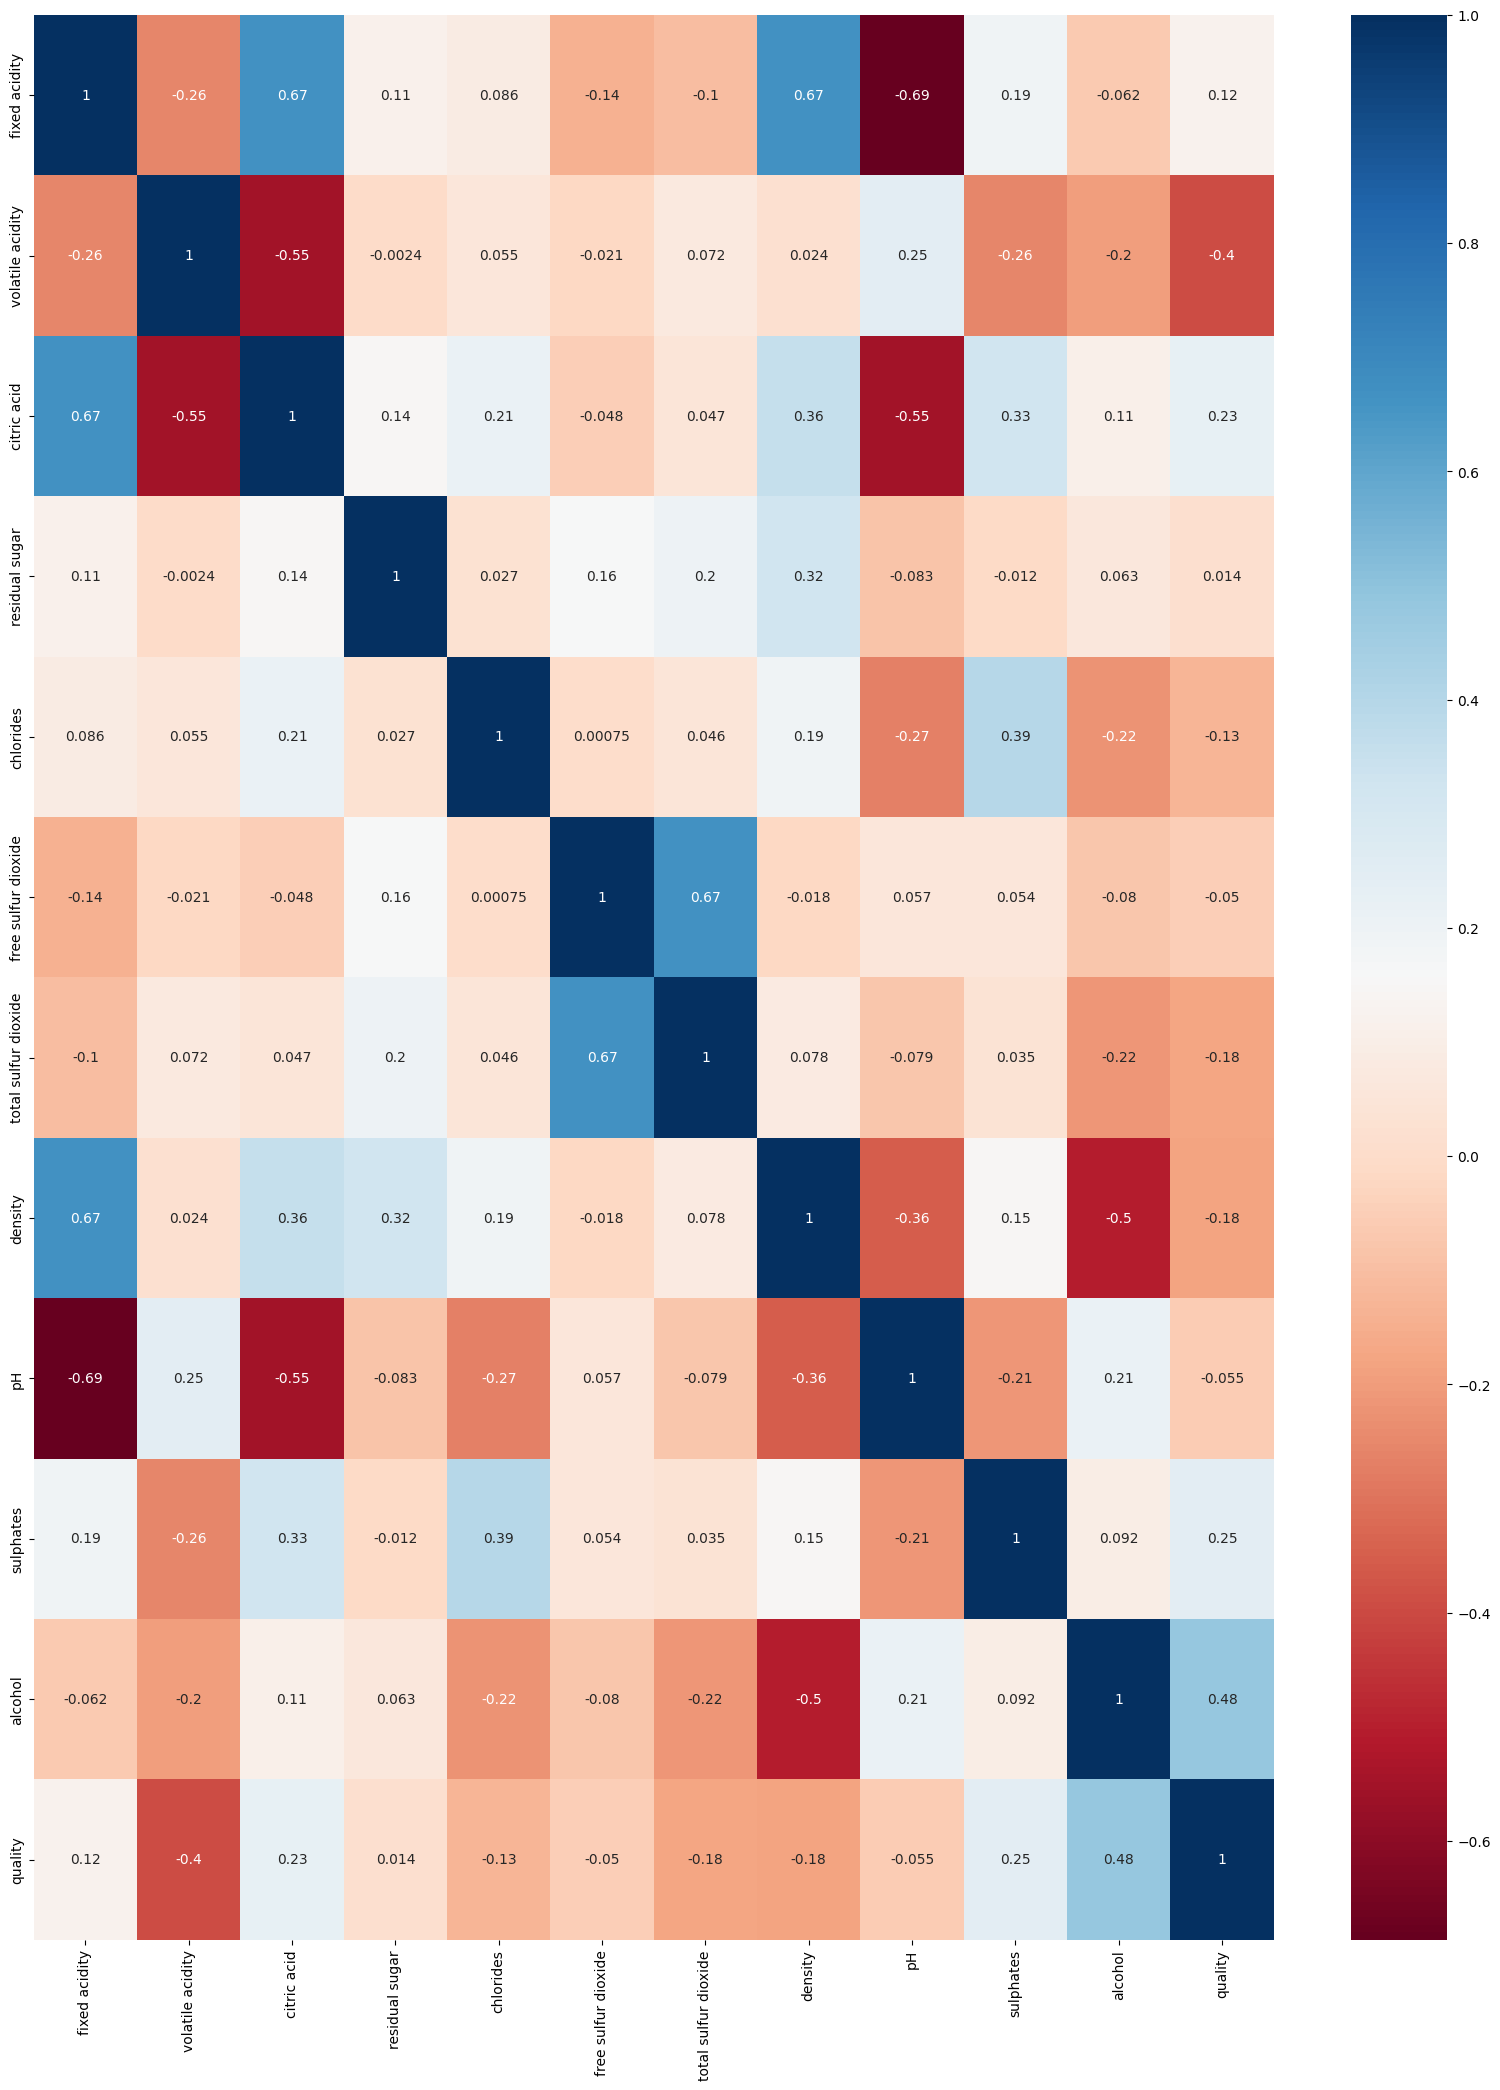

In [10]:
plt.figure(figsize=(20,25))
sns.heatmap(data.corr(), annot=True,cmap='RdBu')
plt.show()

**Training  model**

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print("R2 Score:",r2_score(Y_valid, Y_pred))
print("Mean absolute percentage error:",mean_absolute_percentage_error(Y_valid, Y_pred))

R2 Score: 0.22489896466276016
Mean absolute percentage error: 0.1045523038885381


**Visualization:**

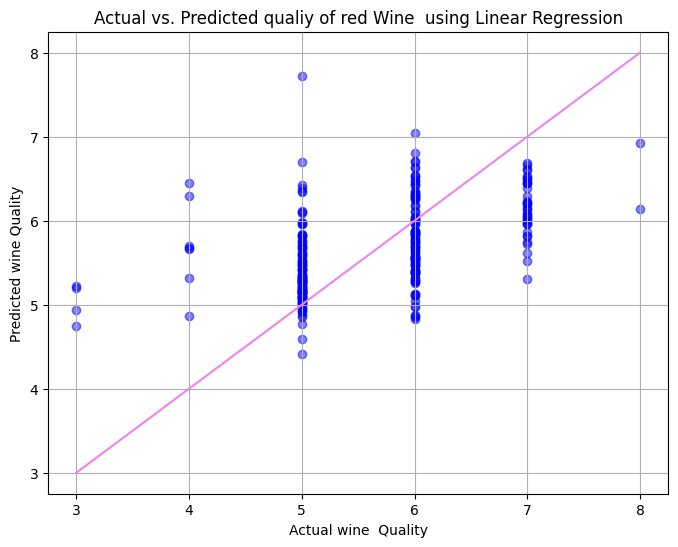

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(Y_valid, Y_pred, color='blue', alpha=0.5)
plt.title('Actual vs. Predicted qualiy of red Wine  using Linear Regression')
plt.xlabel('Actual wine  Quality')
plt.ylabel('Predicted wine Quality')
plt.grid(True)

plt.plot([min(Y_valid), max(Y_valid)], [min(Y_valid), max(Y_valid)], color='violet', linestyle='-')

plt.show()
